In [0]:
!pip install pyLDAvis

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
from pprint import pprint

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#plottinh tools
import pyLDAvis
import pyLDAvis.gensim

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Load Dataset

In [0]:
data = pd.read_csv('clean_tweet_EN.csv')

In [5]:
data.head()

,Post
0,yes sir make fake news careful
1,protester burn local parliament building west ...
2,vero note largest protest jayapura long time m...
3,year least people mostly woman child died hand...
4,indonesia jokowi urge calm violent west papua ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24893 entries, 0 to 24892
Data columns (total 1 columns):
Post    24893 non-null object
dtypes: object(1)
memory usage: 194.6+ KB


### Drop NA in Data Frame

In [7]:
print(data.isna().sum())
data = data.dropna()
print(data.isna().sum())

Post    0
dtype: int64
Post    0
dtype: int64


In [8]:
print(len(data))
data = data.drop_duplicates()
print(len(data))


24893
18410


## Wordcloud

(-0.5, 399.5, 199.5, -0.5)

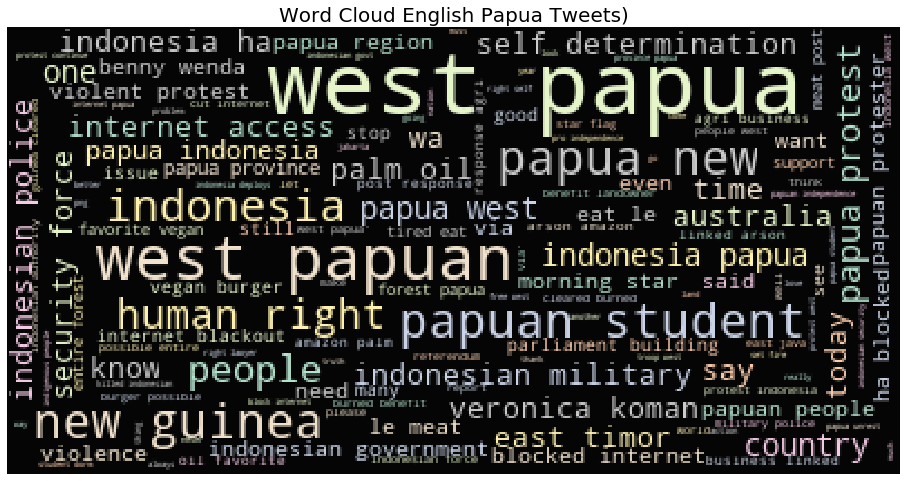

In [0]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(data['Post']))
plt.title("Word Cloud English Papua Tweets)", fontsize=20)
#plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

## Creating Corpus and Dictionary

In [11]:
def sent_to_words(sentence):
    return gensim.utils.simple_preprocess(str(sentence), deacc=True)  # deacc=True removes punctuations

data_words = [(sent_to_words(d)) for d in data['Post']]

data_words[:2]

[['yes', 'sir', 'make', 'fake', 'news', 'careful'],
 ['protester', 'burn', 'local', 'parliament', 'building', 'west', 'papua']]

In [13]:
#create dictionary
id2word = corpora.Dictionary(data_words)

#create corpus
texts = data_words

#term document frequency
corpus = [id2word.doc2bow(text) for text in texts] #mapping of [word_id, word_freq]

print(corpus[:5])
print(id2word[0])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(9, 3), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(9, 1), (26, 1), (28, 1), (38, 1), (39, 1), (40, 2), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(9, 1), (12, 1), (27, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)]]
careful


In [15]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('careful', 1),
  ('fake', 1),
  ('make', 1),
  ('news', 1),
  ('sir', 1),
  ('yes', 1)],
 [('building', 1),
  ('burn', 1),
  ('local', 1),
  ('papua', 1),
  ('parliament', 1),
  ('protester', 1),
  ('west', 1)]]

## LDA Model

In [16]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word,num_topics=6,
                                           random_state=100, update_every=1,
                                           chunksize=5000, passes=10, alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.056*"papua" + 0.028*"indonesia" + 0.027*"internet" + 0.027*"protest" + '
  '0.024*"west" + 0.014*"police" + 0.013*"news" + 0.013*"indonesian" + '
  '0.013*"unrest" + 0.010*"ha"'),
 (1,
  '0.061*"papua" + 0.038*"west" + 0.025*"indonesia" + 0.017*"papuan" + '
  '0.014*"people" + 0.013*"protest" + 0.013*"independence" + 0.009*"right" + '
  '0.008*"indonesian" + 0.008*"new"'),
 (2,
  '0.039*"papuan" + 0.031*"indonesian" + 0.026*"west" + 0.021*"papua" + '
  '0.016*"police" + 0.015*"student" + 0.012*"military" + 0.010*"killed" + '
  '0.009*"protester" + 0.008*"force"'),
 (3,
  '0.034*"new" + 0.030*"guinea" + 0.019*"papua" + 0.013*"post" + 0.012*"oil" + '
  '0.012*"burned" + 0.012*"amazon" + 0.011*"palm" + 0.011*"possible" + '
  '0.010*"forest"'),
 (4,
  '0.023*"papua" + 0.017*"dan" + 0.016*"di" + 0.012*"veronica" + 0.012*"koman" '
  '+ 0.011*"yang" + 0.010*"ini" + 0.008*"tersangka" + 0.006*"provokasi" + '
  '0.006*"yg"'),
 (5,
  '0.039*"papua" + 0.017*"student" + 0.014*"surabaya" +

In [17]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.448470710705836

Coherence Score:  0.5480883398799543


In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

In [0]:
pyLDAvis.save_html(vis, 'lda_30-10-2019_4 topics_c052.html')

In [0]:
from google.colab import files
files.download('lda_30-10-2019_4 topics_c052.html')

### Find the optimal number of topics for LDA

In [0]:
def compute_coherence_values_LDA(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    """
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word,num_topics=num_topics,update_every=1,
                                           random_state=100,chunksize=5000, passes=10,alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
model_list, coherence_values = compute_coherence_values_LDA(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=10, step=1)

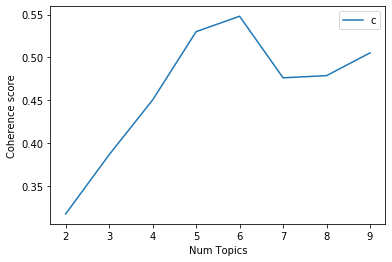

In [0]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3172
Num Topics = 3  has Coherence Value of 0.3863
Num Topics = 4  has Coherence Value of 0.4503
Num Topics = 5  has Coherence Value of 0.5301
Num Topics = 6  has Coherence Value of 0.5481
Num Topics = 7  has Coherence Value of 0.4762
Num Topics = 8  has Coherence Value of 0.4787
Num Topics = 9  has Coherence Value of 0.5053


In [0]:
pprint(model_list[4].show_topics(formatted=False))

[(0,
  [('papua', 0.0555919),
   ('indonesia', 0.027883522),
   ('internet', 0.026895264),
   ('protest', 0.026515745),
   ('west', 0.02369658),
   ('police', 0.013906976),
   ('news', 0.013453175),
   ('indonesian', 0.013355848),
   ('unrest', 0.013195391),
   ('ha', 0.010278508)]),
 (1,
  [('papua', 0.061026655),
   ('west', 0.037732065),
   ('indonesia', 0.02482735),
   ('papuan', 0.017106215),
   ('people', 0.014201765),
   ('protest', 0.013273512),
   ('independence', 0.013001151),
   ('right', 0.008682019),
   ('indonesian', 0.007537094),
   ('new', 0.0075073014)]),
 (2,
  [('papuan', 0.038888812),
   ('indonesian', 0.031078009),
   ('west', 0.025743168),
   ('papua', 0.021205606),
   ('police', 0.016431862),
   ('student', 0.015293867),
   ('military', 0.012210866),
   ('killed', 0.010081439),
   ('protester', 0.008932881),
   ('force', 0.008354893)]),
 (3,
  [('new', 0.033545587),
   ('guinea', 0.029852586),
   ('papua', 0.019388547),
   ('post', 0.013180068),
   ('oil', 0.0121

In [0]:
pyLDAvis.enable_notebook()
optimal_model = model_list[4]
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.176228 -0.010064       1        1  40.627785
2      0.163928 -0.079260       2        1  20.966663
0      0.153708 -0.052187       3        1  19.495533
3     -0.044031  0.314158       4        1   7.052836
4     -0.311017 -0.073487       5        1   6.813822
5     -0.138816 -0.099159       6        1   5.043358, topic_info=     Category          Freq      Term         Total  loglift  logprob
509   Default   2579.000000       new   2579.000000  30.0000  30.0000
535   Default   2277.000000  internet   2277.000000  29.0000  29.0000
508   Default   1814.000000    guinea   1814.000000  28.0000  28.0000
9     Default  19459.000000     papua  19459.000000  27.0000  27.0000
184   Default   7326.000000    papuan   7326.000000  26.0000  26.0000
...       ...           ...       ...           ...      ...      ...
392    Topic6    121.383698    police   3337.191162  -0.3268  -5.1918
61     Topic6     72.635277    jokowi    344.983215   1.4291  -5.7053
211    Topic6     87.561157     right   2463.069824  -0.3497  -5.5184
1204   Topic6     68.882431      open    387.606995   1.2595  -5.7584
112    Topic6     67.554001        wa   1608.232178  -0.1829  -5.7778

[387 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
529       3  0.998217   access
8257      5  0.024558    actor
8257      6  0.957768    actor
5405      4  0.991865       ad
340       5  0.996151      ada
...     ...       ...      ...
8701      2  0.997409  wounded
142       5  0.997923     yang
1696      6  0.985791      yel
440       5  0.952980       yg
440       6  0.045927       yg

[646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4, 5, 6])

In [0]:
from google.colab import files

In [0]:
pyLDAvis.save_html(vis, 'lda_EN.html')


files.download('lda_EN.html')

### Finding the dominant topic in each tweet

determine what topic a given document is about

In [31]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.4750,"new, guinea, papua, post, oil, burned, amazon,...","[yes, sir, make, fake, news, careful]"
1,1,1.0,0.9358,"papua, west, indonesia, papuan, people, protes...","[protester, burn, local, parliament, building,..."
2,2,1.0,0.6608,"papua, west, indonesia, papuan, people, protes...","[vero, note, largest, protest, jayapura, long,..."
3,3,2.0,0.8462,"papuan, indonesian, west, papua, police, stude...","[year, least, people, mostly, woman, child, di..."
4,4,0.0,0.8356,"papua, indonesia, internet, protest, west, pol...","[indonesia, jokowi, urge, calm, violent, west,..."
5,5,4.0,0.9771,"papua, dan, di, veronica, koman, yang, ini, te...","[admin, rasa, buzzer, hoax, saya, meminta, kla..."
6,6,1.0,0.5499,"papua, west, indonesia, papuan, people, protes...","[let, clear, papua, protest, sparked, hoax, li..."
7,7,4.0,0.9801,"papua, dan, di, veronica, koman, yang, ini, te...","[keep, fight, kalau, saya, memang, berniat, pr..."
8,8,2.0,0.7462,"papuan, indonesian, west, papua, police, stude...","[say, racism, matter, color, skin, culture, st..."
9,9,4.0,0.6962,"papua, dan, di, veronica, koman, yang, ini, te...","[white, guilt, feel, white, classmate, feel, m..."


### Find the most representative document for each topic

In [32]:
sorted_df_mallet = pd.DataFrame()
df_grouped = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in df_grouped:
  sorted_df_mallet = pd.concat([sorted_df_mallet, grp.sort_values(['Perc_Contribution'], 
                                                                  ascending=[0]).head(1)],
                              axis=0)
  
  sorted_df_mallet.reset_index(drop=True, inplace=True)
  #sorted_df_mallet.columns = ['Topic_num', 'Topic_Perc_Contrib', 'Keywords','Text']
  
sorted_df_mallet.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,0.0,0.9852,"papua, indonesia, internet, protest, west, pol...","[human, right, lawyer, veronica, koman, interp..."
1,1.0,0.9910,"papua, west, indonesia, papuan, people, protes...","[racism, indonesian, ward, west, papuan, melan..."
2,2.0,0.9857,"papuan, indonesian, west, papua, police, stude...","[ask, think, un, indicted, war, criminal, wira..."
3,3.0,0.9866,"new, guinea, papua, post, oil, burned, amazon,...","[favorite, vegan, burger, none, vegan, burger,..."
4,4.0,0.9819,"papua, dan, di, veronica, koman, yang, ini, te...","[agreed, dear, pak, bpk, prnh, bilang, thn, ke..."


### Topic distribution accross documents

In [33]:
#number of documents for each topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

#percentage of documents for each topic
topic_contribution = round(topic_counts/topic_counts.sum(),4)

#topic number and keywords
#topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
topic = pd.Series(sorted(df_topic_sents_keywords['Dominant_Topic'].unique()))
keywords = df_topic_sents_keywords['Topic_Keywords'].groupby(df_topic_sents_keywords['Dominant_Topic']).first()

df_dominant_topics = pd.concat([topic,keywords, topic_counts, topic_contribution], axis=1)

df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"papua, indonesia, internet, protest, west, pol...",3575,0.1942
1.0,1.0,"papua, west, indonesia, papuan, people, protes...",8120,0.4411
2.0,2.0,"papuan, indonesian, west, papua, police, stude...",3750,0.2037
3.0,3.0,"new, guinea, papua, post, oil, burned, amazon,...",1048,0.0569
4.0,4.0,"papua, dan, di, veronica, koman, yang, ini, te...",1291,0.0701
5.0,5.0,"papua, student, surabaya, java, papuan, dorm, ...",626,0.0340


In [0]:
df_dominant_topic.to_csv('LDA_dominant_topic_EN.csv', index=False)
sorted_df_mallet.to_csv('LDA_rep_document_EN.csv', index=False)
df_dominant_topics.to_csv('LDA_topic_distribution_EN.csv', index=False)

from google.colab import files
files.download('LDA_dominant_topic_EN.csv')
files.download('LDA_rep_document_EN.csv')
files.download('LDA_topic_distribution_EN.csv')

## Wordcloud for each topics

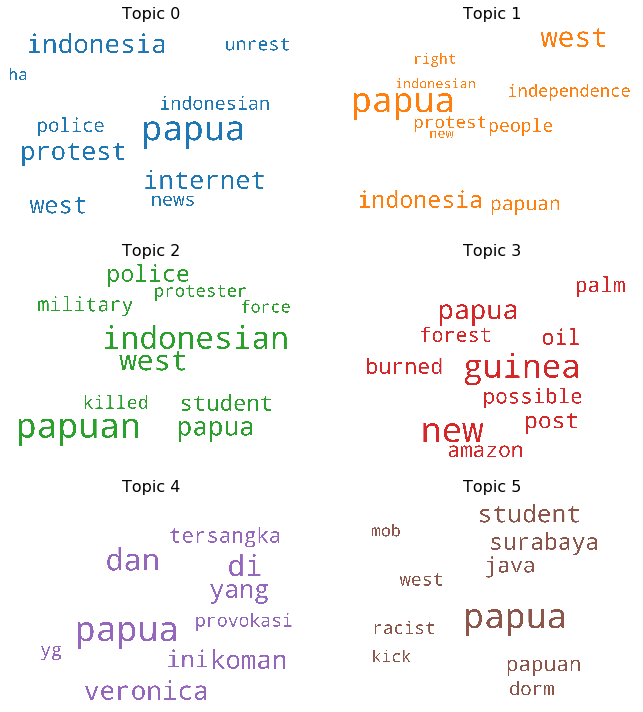

In [37]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3,2 , figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

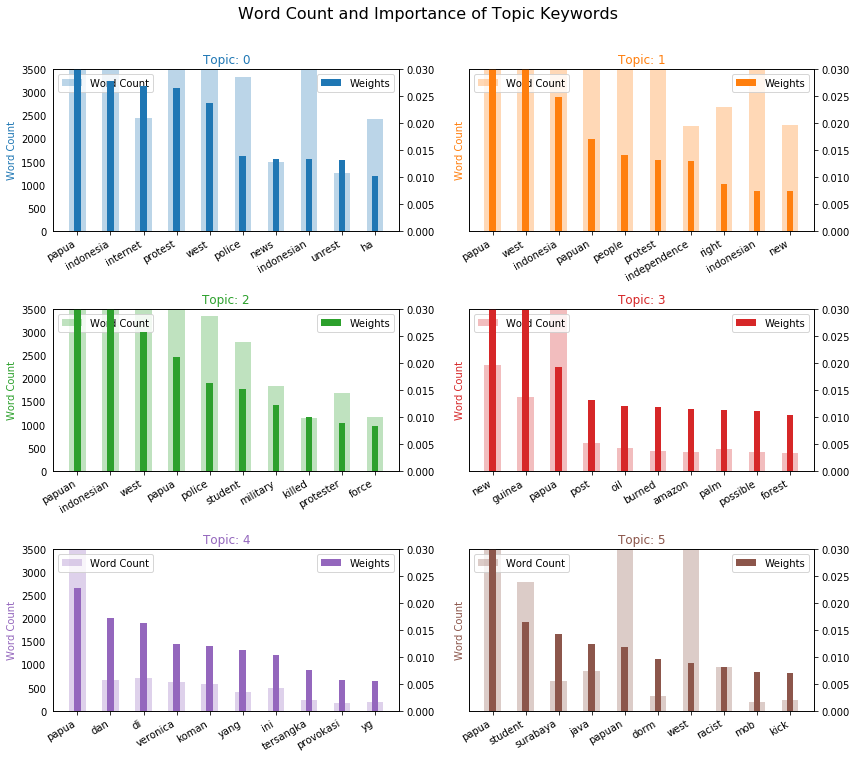

In [49]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(12,10), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=16, y=1.05)    
plt.show()

In [50]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 6
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18237 samples in 0.013s...
[t-SNE] Computed neighbors for 18237 samples in 0.526s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18237
[t-SNE] Computed conditional probabilities for sample 2000 / 18237
[t-SNE] Computed conditional probabilities for sample 3000 / 18237
[t-SNE] Computed conditional probabilities for sample 4000 / 18237
[t-SNE] Computed conditional probabilities for sample 5000 / 18237
[t-SNE] Computed conditional probabilities for sample 6000 / 18237
[t-SNE] Computed conditional probabilities for sample 7000 / 18237
[t-SNE] Computed conditional probabilities for sample 8000 / 18237
[t-SNE] Computed conditional probabilities for sample 9000 / 18237
[t-SNE] Computed conditional probabilities for sample 10000 / 18237
[t-SNE] Computed conditional probabilities for sample 11000 / 18237
[t-SNE] Computed conditional probabilities for sample 12000 / 18237
[t-SNE] Computed conditional probabilities for sam

Sumber : https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ 